In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [272]:
ted = pd.read_csv('ted_main.csv')

In [273]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [274]:
ted.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [275]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [276]:
#removing duplicate rows
ted.drop_duplicates(keep='first',inplace=True)

In [277]:
#checking for the correct data types
ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%m-%d-%y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%m-%d-%y'))

In [278]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null object
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null object
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(5), object(12)
memory usage: 358.6+ KB


In [279]:
#Reformat the columns to make it readable
ted = ted[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 
     'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 
     'ratings', 'related_talks', 'url', 'views']]

In [280]:
ted.head(3)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,02-24-06,06-26-06,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,02-24-06,06-26-06,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,02-23-06,06-26-06,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292


#### Most Viewed Talks of All Time

In [281]:
topTalks = ted[['title', 'main_speaker', 'views', 'comments', 'film_date', 'event']].sort_values('views', ascending=False).head(10)
topTalks

,title,main_speaker,views,comments,film_date,event
0,Do schools kill creativity?,Ken Robinson,47227110,4553,02-24-06,TED2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290,06-25-12,TEDGlobal 2012
677,How great leaders inspire action,Simon Sinek,34309432,1930,09-16-09,TEDxPuget Sound
837,The power of vulnerability,Brené Brown,31168150,1927,06-05-10,TEDxHouston
452,10 things you didn't know about orgasm,Mary Roach,22270883,354,02-05-09,TED2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,297,06-09-13,TEDGlobal 2013
201,My stroke of insight,Jill Bolte Taylor,21190883,2877,02-26-08,TED2008
5,Why we do what we do,Tony Robbins,20685401,672,02-01-06,TED2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,150,12-07-15,TEDGlobal>Geneva
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,846,10-26-12,TEDxMidAtlantic


###### My observations:
- Ken Robinson's talk 'Do schools kill creativity?' is the most viewed TED talk of all time
- TED talks with the most amount of comments does not necessarily mean the viewers are most engaged.
- Ken Robinson with 47 million views and Amy Cuddy with 43 million views are much ahead of the pack. 
- In fact, the very next Talk after Amy Cuddy with the most views is Simon Sinek with 34 Million views. 

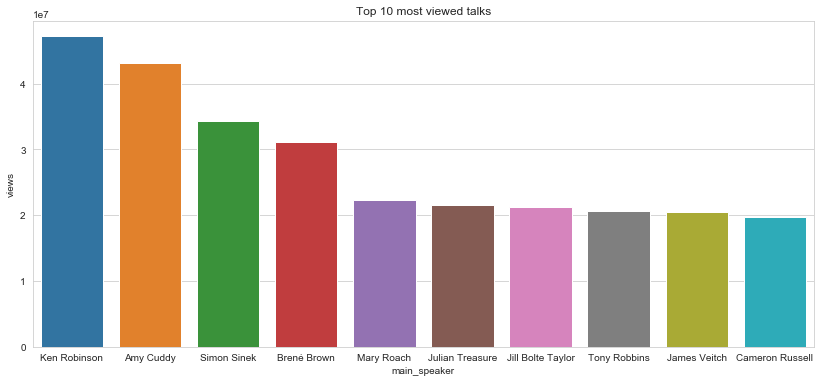

In [282]:
plt.figure(figsize=(14,6))
plt.title('Top 10 most viewed talks')
sns.barplot(x='main_speaker', y='views', data=topTalks)

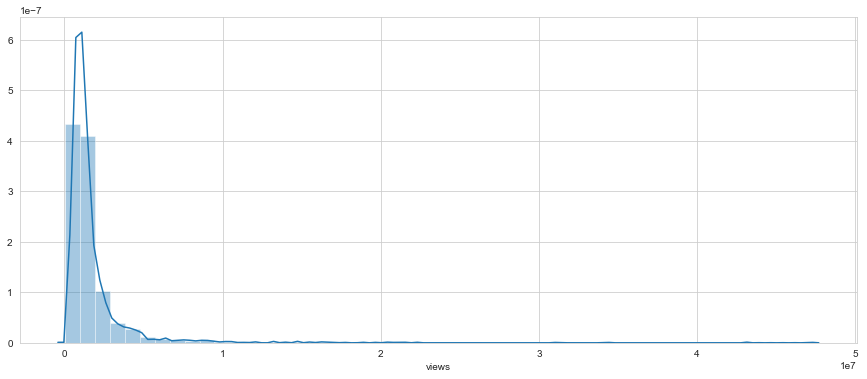

In [283]:
plt.figure(figsize=(15,6))
sns.distplot(ted['views'])

Majority of TED talks have under one million views.

In [284]:
ted['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

Std is greater than the average, which suggest that there are many outliers. 

##### Are Views related to Comments?

In [285]:
ted['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

There are many outliers as well. 

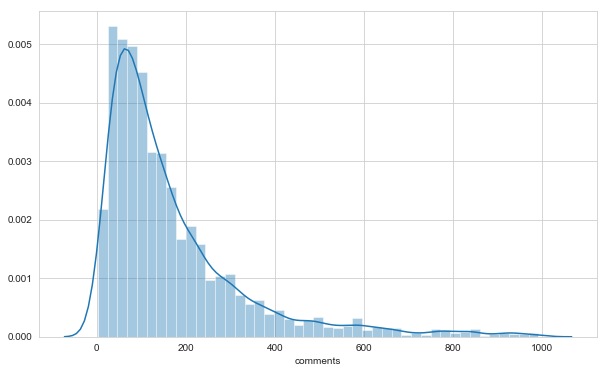

In [286]:
plt.figure(figsize=(10,6))
sns.distplot(ted[ted['comments'] < 1000]['comments'])

Indeed, comments have many outliers. Majority of comments are right under 400 comments. The mean is 191 becasue of ourliers. 

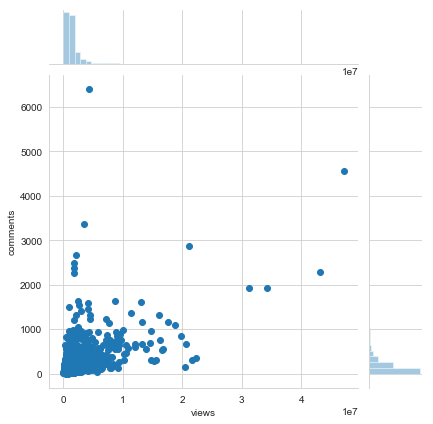

In [287]:
sns.jointplot(x='views', y='comments', data=ted)

In [288]:
ted[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


I was wrong, there is a corrolation between views and comments becasue thepearson coefficient is about .53, which proves there is a corrolation.  

#### Most commented TED talk

In [289]:
ted[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False)[:10]

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


In [290]:
topTalks

,title,main_speaker,views,comments,film_date,event
0,Do schools kill creativity?,Ken Robinson,47227110,4553,02-24-06,TED2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290,06-25-12,TEDGlobal 2012
677,How great leaders inspire action,Simon Sinek,34309432,1930,09-16-09,TEDxPuget Sound
837,The power of vulnerability,Brené Brown,31168150,1927,06-05-10,TEDxHouston
452,10 things you didn't know about orgasm,Mary Roach,22270883,354,02-05-09,TED2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,297,06-09-13,TEDGlobal 2013
201,My stroke of insight,Jill Bolte Taylor,21190883,2877,02-26-08,TED2008
5,Why we do what we do,Tony Robbins,20685401,672,02-01-06,TED2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,150,12-07-15,TEDGlobal>Geneva
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,846,10-26-12,TEDxMidAtlantic


Only few talks are in both dataframe. Then, what talks are more engaging to the audience?

In [291]:
#discussion quotient
ted['dis_quo'] = ted['comments']/ted['views']

In [292]:
ted[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False)[:10]

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,12-01-09
803,E-voting without fraud,David Bismark,543551,834,0.001534,07-13-10
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-01-02
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,02-09-10
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-02-11
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-09-10
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,12-07-10
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,03-17-14
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,02-10-10
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,11-03-09


Many of those are actually things that affect mankind. There is still something not correct. 

#### Analyze TED talks by months

In [293]:
month_order = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
ted['months'] = ted['film_date'].apply(lambda x: x[:2]).map(month_order)

In [294]:
monthlyTalks = ted['months'].value_counts()
monthlyTalks

Feb    645
Mar    354
Jun    271
Jul    250
Nov    240
Oct    205
Apr    172
May    123
Sep    114
Dec    111
Jan     33
Aug     32
Name: months, dtype: int64

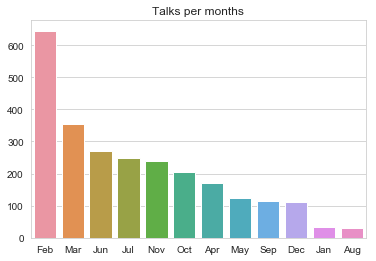

In [295]:
#Bar plot Example
plt.title('Talks per months')
sns.barplot(x= monthlyTalks.index, y=monthlyTalks.values)

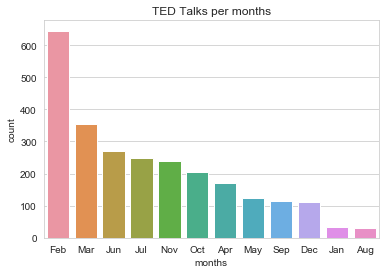

In [296]:
#Count plot Example
plt.title('TED Talks per months')
sns.countplot(x=ted['months'], order=ted['months'].value_counts().index)

###### My observations:
- February has the most amount of TED talks. 
- January and Auguest has the least amount of TED talks. 

In [297]:
tedxTalks = ted[ted['event'].str.contains('TEDx')]
tedxTalks

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,dis_quo,months
470,Jane Poynter: Life in Biosphere 2,Life in Biosphere 2,Jane Poynter tells her story of living two yea...,Jane Poynter,Biospherian,1,953,TEDxUSC,03-22-09,06-14-09,103,"['TEDx', 'adventure', 'biotech', 'climate chan...",27,"[{'id': 10, 'name': 'Inspiring', 'count': 407}...","[{'id': 490, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/jane_poynter_life_in...,843719,0.000122,Mar
474,Qi Zhang: An electrifying organ performance,An electrifying organ performance,Organ virtuoso Qi Zhang plays her electric ren...,Qi Zhang,Organist,1,185,TEDxUSC,03-22-09,06-19-09,135,"['TEDx', 'china', 'music', 'performance', 'pia...",0,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 46, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/qi_zhang_s_electrify...,803691,0.000168,Mar
529,David Logan: Tribal leadership,Tribal leadership,David Logan talks about the five kinds of trib...,David Logan,Professor of management,1,999,TEDxUSC,03-22-09,10-05-09,248,"['TEDx', 'business', 'communication', 'culture...",25,"[{'id': 22, 'name': 'Fascinating', 'count': 33...","[{'id': 538, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/david_logan_on_triba...,1404586,0.000177,Mar
538,John Gerzema: The post-crisis consumer,The post-crisis consumer,John Gerzema says there's an upside to the rec...,John Gerzema,Marketing whiz,1,994,TEDxKC,08-19-09,10-18-09,133,"['TEDx', 'advertising', 'business', 'consumeri...",21,"[{'id': 25, 'name': 'OK', 'count': 94}, {'id':...","[{'id': 658, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/john_gerzema_the_pos...,760493,0.000175,Aug
539,Paul Debevec: Animating a photo-real digital face,Animating a photo-real digital face,Computer graphics trailblazer Paul Debevec exp...,Paul Debevec,Computer graphics pioneer,1,366,TEDxUSC,03-22-09,10-20-09,89,"['TEDx', 'animation', 'art', 'computers', 'des...",24,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1...","[{'id': 469, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/paul_debevec_animate...,748862,0.000119,Mar
585,Dan Buettner: How to live to be 100+,How to live to be 100+,"To find the path to long life and health, Dan ...",Dan Buettner,"Longevity coach, explorer",1,1179,TEDxTC,09-01-09,01-06-10,304,"['TEDx', 'biology', 'culture', 'exploration', ...",32,"[{'id': 22, 'name': 'Fascinating', 'count': 86...","[{'id': 39, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/dan_buettner_how_to_...,3157446,0.000096,Sep
603,Joshua Prince-Ramus: Building a theater that r...,Building a theater that remakes itself,Can architects re-engineer their design proces...,Joshua Prince-Ramus,Architect,1,1122,TEDxSMU,10-09-09,01-26-10,37,"['TEDx', 'architecture', 'creativity', 'design...",22,"[{'id': 25, 'name': 'OK', 'count': 22}, {'id':...","[{'id': 49, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/joshua_prince_ramus_...,717531,0.000052,Oct
610,George Whitesides: A lab the size of a postage...,A lab the size of a postage stamp,Traditional lab tests for disease diagnosis ca...,George Whitesides,Chemist,1,976,TEDxBoston 2009,07-27-09,02-03-10,68,"['TEDx', 'biotech', 'chemistry', 'disease', 'h...",20,"[{'id': 9, 'name': 'Ingenious', 'count': 313},...","[{'id': 642, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/george_whitesides_a_...,496827,0.000137,Jul
613,Peter Eigen: How to expose the corrupt,How to expose the corrupt,Some of the world's most baffling social probl...,Peter Eigen,"Founder, Transparency International",1,1021,TEDxBerlin,11-29-09,02-08-10,196,"['TEDx', 'corruption', 'global issues', 'money...",26,"[{'id': 10, 'name': 'Inspiring', 'count': 349}...","[{'id': 127, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/peter_eigen_how_to_e...,741625,0.000264,Nov
619,Kevin Kelly:

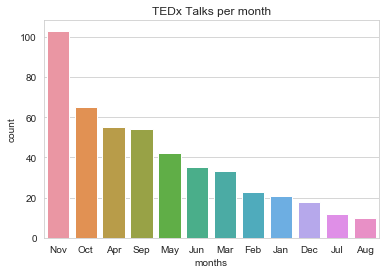

In [298]:
plt.title('TEDx Talks per month')
sns.countplot(tedxTalks['months'], order=tedxTalks['months'].value_counts().index)

In [299]:
tedxTalks['months'].value_counts()

Nov    103
Oct     65
Apr     55
Sep     54
May     42
Jun     35
Mar     33
Feb     23
Jan     21
Dec     18
Jul     12
Aug     10
Name: months, dtype: int64

###### My observations:
- November has the most TEDx talks.
- Auguest has the least amount of talks for TEDx as well.

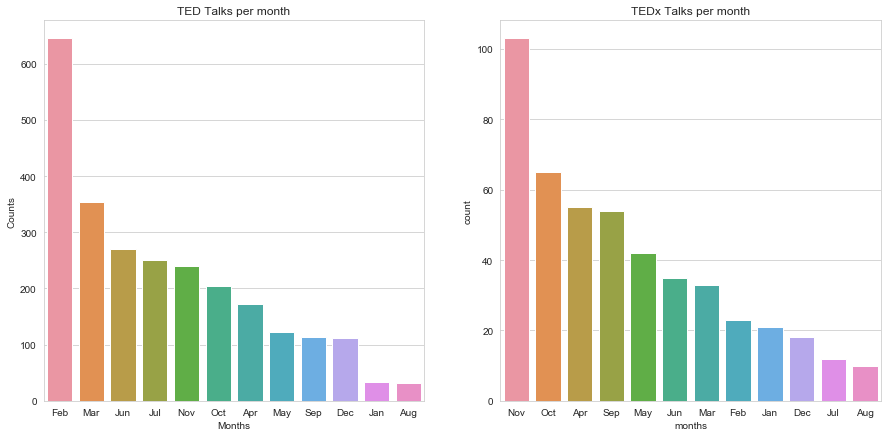

In [300]:
#Subplot Example
fig, axes = plt.subplots(1,2, figsize=(15, 7))

axes[0].set_title('TED Talks per month')
axes[0].set_ylabel('Counts')
axes[0].set_xlabel('Months')
sns.barplot(x=monthlyTalks.index, y=monthlyTalks.values, ax=axes[0])

axes[1].set_title('TEDx Talks per month')
axes[1].set_ylabel('Counts')
axes[1].set_xlabel('Months')
sns.countplot(tedxTalks['months'], order=tedxTalks['months'].value_counts().index, ax=axes[1])

- Although, August has the lowest amount of talks for both categories
- There is no relationship between TED talks and TEDx talks. 

#### Analyze TED talks by months

In [301]:
#change film_date data type to datetime so that I get use .weekday()
ted['film_date'] = pd.to_datetime(ted['film_date'])

In [302]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2550 entries, 0 to 2549
Data columns (total 19 columns):
name                  2550 non-null object
title                 2550 non-null object
description           2550 non-null object
main_speaker          2550 non-null object
speaker_occupation    2544 non-null object
num_speaker           2550 non-null int64
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null datetime64[ns]
published_date        2550 non-null object
comments              2550 non-null int64
tags                  2550 non-null object
languages             2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dis_quo               2550 non-null float64
months                2550 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(12)
memory usage

In [303]:
day_order = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

#get week days
ted['week_day'] = ted['film_date'].apply(lambda x: x.weekday()+1).map(day_order)
ted[['title', 'main_speaker', 'film_date', 'week_day']].head()

,title,main_speaker,film_date,week_day
0,Do schools kill creativity?,Ken Robinson,2006-02-24,Fri
1,Averting the climate crisis,Al Gore,2006-02-24,Fri
2,Simplicity sells,David Pogue,2006-02-23,Thu
3,Greening the ghetto,Majora Carter,2006-02-25,Sat
4,The best stats you've ever seen,Hans Rosling,2006-02-21,Tue


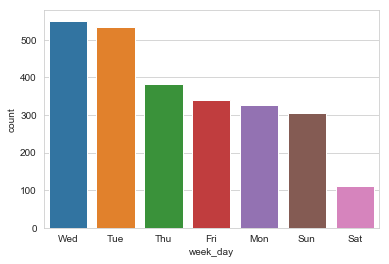

In [304]:
sns.countplot(x=ted['week_day'], order=ted['week_day'].value_counts().index)

In [305]:
ted['week_day'].value_counts()

Wed    551
Tue    534
Thu    382
Fri    339
Mon    326
Sun    306
Sat    112
Name: week_day, dtype: int64

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Week Day')]

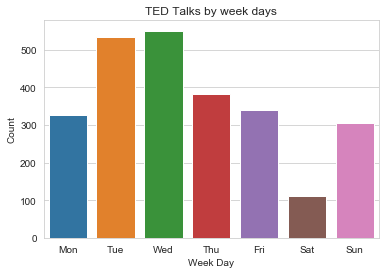

In [306]:
plt.title('TED Talks by week days')

talkPerWeekViz = sns.countplot(x=ted['week_day'], order=day_order.values())
talkPerWeekViz.set(xlabel='Week Day', ylabel='Count')

- Majority of the TED Talks are in the middle of the week.
- Wednesday has the most TED Talks followed by Tuesday and then Thursday. 

#### Analyze TED talks by years

In [307]:
#Get film year
ted['film_year'] = ted['film_date'].apply(lambda date: date.year)
ted[['title', 'main_speaker', 'film_date', 'film_year']].head()

,title,main_speaker,film_date,film_year
0,Do schools kill creativity?,Ken Robinson,2006-02-24,2006
1,Averting the climate crisis,Al Gore,2006-02-24,2006
2,Simplicity sells,David Pogue,2006-02-23,2006
3,Greening the ghetto,Majora Carter,2006-02-25,2006
4,The best stats you've ever seen,Hans Rosling,2006-02-21,2006


[Text(0, 0.5, 'Talks'),
 Text(0.5, 0, 'Years'),
 Text(0.5, 1.0, 'TED Talks Per Years')]

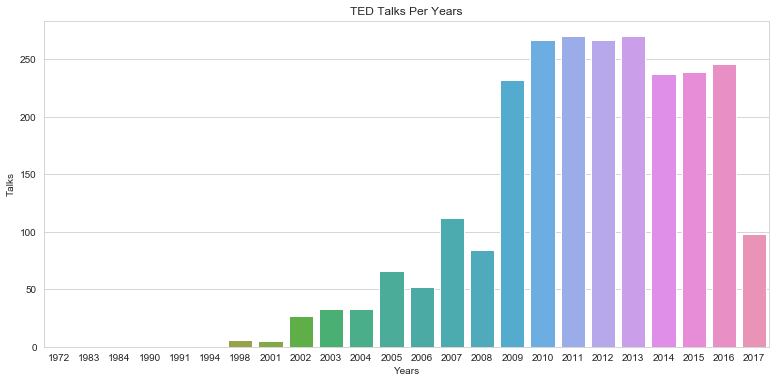

In [308]:
plt.figure(figsize=(13,6))

talksPerYearViz = sns.countplot(ted['film_year'])
talksPerYearViz.set(xlabel='Years', ylabel='Talks', title='TED Talks Per Years')

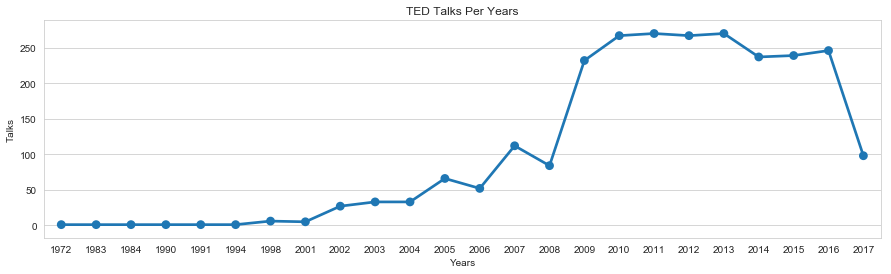

In [309]:
plt.figure(figsize=(15,4))
plt.title('TED Talks Per Years')
plt.xlabel('Years')
plt.ylabel('Talks')

sns.pointplot(x=ted['film_year'].value_counts().index, y=ted['film_year'].value_counts().values)

- TED Talks took a big jump after the year of 2008, however it has been declining recently.

In [310]:
#Make a Heat Map
test = pd.DataFrame(ted.groupby(by=['film_year', 'months']).name.count()).reset_index()
test.head()

,film_year,months,name
0,1972,May,1
1,1983,Jul,1
2,1984,Feb,1
3,1990,Mar,1
4,1991,Dec,1


In [311]:
#Convert months to a numerical values so that I can sort it by film_year and months in the correct order. 
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

test['months_num'] = test['months'].map(months)
test.sort_values(by=['film_year','months_num'], inplace=True)
test.head(10)

,film_year,months,name,months_num
0,1972,May,1,5
1,1983,Jul,1,7
2,1984,Feb,1,2
3,1990,Mar,1,3
4,1991,Dec,1,12
5,1994,Feb,1,2
6,1998,Feb,6,2
8,2001,Jan,1,1
7,2001,Feb,3,2
9,2001,May,1,5


In [312]:
#Pivot table is require to make a heat map.
testPivot = test.pivot('months_num','film_year','name')
testPivot.fillna(0, inplace=True)
testPivot.head(3)

film_year,1972,1983,1984,1990,1991,1994,1998,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
months_num,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,6.0,3.0,7.0,3.0,2.0,4.0,3.0
2,0.0,0.0,1.0,0.0,0.0,1.0,6.0,3.0,25.0,31.0,...,49.0,83.0,70.0,12.0,65.0,81.0,4.0,1.0,83.0,11.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,...,8.0,5.0,4.0,68.0,14.0,7.0,91.0,78.0,3.0,7.0


In [313]:
#convert months number to it's name in the pivot table. 
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
testPivot['monsName'] = testPivot.index.map(months)
testPivot.head(3)

film_year,1972,1983,1984,1990,1991,1994,1998,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,monsName
months_num,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,6.0,3.0,7.0,3.0,2.0,4.0,3.0,Jan
2,0.0,0.0,1.0,0.0,0.0,1.0,6.0,3.0,25.0,31.0,...,83.0,70.0,12.0,65.0,81.0,4.0,1.0,83.0,11.0,Feb
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,...,5.0,4.0,68.0,14.0,7.0,91.0,78.0,3.0,7.0,Mar


In [314]:
testPivot.set_index('monsName', inplace=True)

[Text(97.0, 0.5, 'Months'),
 Text(0.5, 34.0, 'Years'),
 Text(0.5, 1.0, 'TED Talks by Month and Year')]

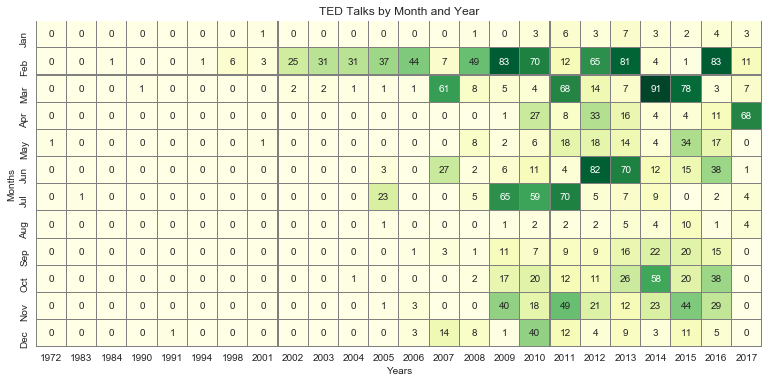

In [315]:
plt.figure(figsize=(13,6))
yearMonthHeatMap = sns.heatmap(testPivot, linewidths=.1, linecolor='Gray', annot=True, cmap="YlGn", cbar=False)
yearMonthHeatMap.set(xlabel='Years', ylabel='Months', title='TED Talks by Month and Year')

- Heat Map pretty much summarizes what year and month has the most amount of TED Talks.
- Really easy to see the distribution of TED Talks over the years.

#### Who has the most amount of TED talks?

In [316]:
ted['main_speaker'].value_counts().head(10)

Hans Rosling            9
Juan Enriquez           7
Rives                   6
Marco Tempest           6
Dan Ariely              5
Clay Shirky             5
Jacqueline Novogratz    5
Bill Gates              5
Nicholas Negroponte     5
Julian Treasure         5
Name: main_speaker, dtype: int64

In [317]:
ted.groupby(['main_speaker','speaker_occupation']).event.count().sort_values(ascending=False).head()

main_speaker   speaker_occupation                  
Hans Rosling   Global health expert; data visionary    9
Juan Enriquez  Futurist                                7
Rives          Performance poet, multimedia artist     6
Marco Tempest  Techno-illusionist                      6
Dan Ariely     Behavioral economist                    5
Name: event, dtype: int64

#### With what occupation can you increase you chances of being a TED Talk speaker?

In [318]:
speakers = ted['speaker_occupation'].value_counts().head(10)
speakers

Writer          45
Designer        34
Artist          34
Journalist      33
Entrepreneur    31
Architect       30
Inventor        27
Psychologist    26
Photographer    25
Filmmaker       21
Name: speaker_occupation, dtype: int64

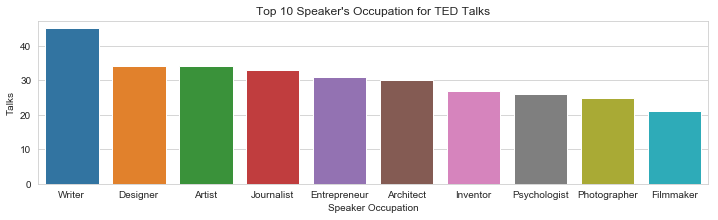

In [319]:
plt.figure(figsize=(12,3))
plt.title("Top 10 Speaker's Occupation for TED Talks")
plt.xlabel('Speaker Occupation')
plt.ylabel('Talks')

sns.barplot(x=speakers.index, y=speakers.values)

Note: Many speakers have multiple occupation.

In [320]:
viewsPerOccupation = ted[ted['speaker_occupation'].isin(speakers.index)].groupby('speaker_occupation').views.sum()
viewsPerOccupation

speaker_occupation
Architect        37549155
Artist           35248703
Designer         43294187
Entrepreneur     61764022
Filmmaker        32112289
Inventor         31350461
Journalist       47860783
Photographer     28257511
Psychologist     90851398
Writer          133549303
Name: views, dtype: int64

#### How many TED Talks had more then one speaker?

In [321]:
ted[ted['num_speaker'] > 1]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,months,week_day,film_year
93,"Eddi Reader: ""Kiteflyer's Hill""","""Kiteflyer's Hill""","Singer/songwriter Eddi Reader performs ""Kitefl...",Eddi Reader,Singer/songwriter,2,378,TED2003,2003-02-01,04-14-07,...,"['composing', 'entertainment', 'guitar', 'memo...",28,"[{'id': 3, 'name': 'Courageous', 'count': 13},...","[{'id': 109, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/eddi_reader_sings_ki...,513672,0.000146,Feb,Sat,2003
94,"Eddi Reader: ""What You've Got""","""What You've Got""","Singer/songwriter Eddi Reader performs ""What Y...",Eddi Reader,Singer/songwriter,2,312,TED2003,2003-02-01,04-14-07,...,"['composing', 'entertainment', 'guitar', 'musi...",25,"[{'id': 1, 'name': 'Beautiful', 'count': 272},...","[{'id': 110, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/eddi_reader_sings_ab...,428351,0.000117,Feb,Sat,2003
98,"Rachelle Garniez: ""La Vie en Rose""","""La Vie en Rose""",Featuring the vocals and mischievous bell-play...,Rachelle Garniez,Musician,2,201,TED2004,2004-02-01,04-15-07,...,"['entertainment', 'live music', 'music', 'perf...",33,"[{'id': 7, 'name': 'Funny', 'count': 58}, {'id...","[{'id': 108, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/thomas_dolby_and_rac...,443180,0.000088,Feb,Sun,2004
100,Natalie MacMaster: Cape Breton fiddling in ree...,Cape Breton fiddling in reel time,Violinist Natalie MacMaster and TED Musical Di...,Natalie MacMaster,Fiddler,2,311,TED2002,2002-02-01,05-01-07,...,"['entertainment', 'history', 'live music', 'mu...",30,"[{'id': 1, 'name': 'Beautiful', 'count': 364},...","[{'id': 45, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/natalie_macmaster_fi...,717002,0.000093,Feb,Fri,2002
101,Sergey Brin + Larry Page: The genesis of Google,The genesis of Google,Google co-founders Larry Page and Sergey Brin ...,Sergey Brin + Larry Page,"Computer scientist, entrepreneur and philanthr...",2,1233,TED2004,2004-02-01,05-03-07,...,"['Google', 'TED Brain Trust', 'business', 'col...",31,"[{'id': 11, 'name': 'Longwinded', 'count': 143...","[{'id': 319, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/sergey_brin_and_larr...,1451846,0.000039,Feb,Sun,2004
193,Jill Sobule + Julia Sweeney: The Jill and Juli...,The Jill and Julia Show,"Two TED favorites, Jill Sobule and Julia Sween...",Jill Sobule + Julia Sweeney,Singer/songwriter,2,374,TED2007,2007-03-02,02-19-08,...,"['collaboration', 'comedy', 'entertainment', '...",23,"[{'id': 3, 'name': 'Courageous', 'count': 34},...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/the_jill_and_julia_s...,487972,0.000094,Mar,Fri,2007
197,Roy Gould + Curtis Wong: A preview of the Worl...,A preview of the WorldWide Telescope,Educator Roy Gould and researcher Curtis Wong ...,Roy Gould + Curtis Wong,Researcher,2,402,TED2008,2008-02-26,02-27-08,...,"['astronomy', 'collaboration', 'demo', 'scienc...",26,"[{'id': 8, 'name': 'Informative', 'count': 170...","[{'id': 178, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/roy_gould_and_curtis...,1034064,0.000068,Feb,Tue,2008
216,Tod Machover + Dan Ellsey: Inventing instrumen...,Inventing instruments that unlock new music,Tod Machover of MIT's Media Lab is devoted to ...,Tod Machover + Dan Ellsey,"Composer, inventor",2,1241,TED2008,2008-03-02,04-14-08,...,"['creativity', 'demo', 'design', 'entertainmen...",21,"[{'id': 22, 'name': 'Fascinating', 'count': 16...","[{'id': 103, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/tod_machover_and_dan...,497153,0.000175,Mar,Sun,2008
249,Sxip Shirey + Rachelle Garniez: A performance ...,"A performance with breath, music, passion",Composer Sxip Shirey makes music from the simp...,Sxip Shirey + Rachelle Garniez,Musician,2,186,TED2008,2008-02-11,06-29-08,...,"['entertainment', 'live music

In [322]:
ted['num_speaker'].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

- 2,492 Ted Talks had one speaker, 49 Talks had two speakers, and the most speakers for any talk was 5. 

#### What TED Event has the most amount of TED Talks publish on the website?

In [323]:
ted['event'].value_counts()[:10]

TED2014           84
TED2009           83
TED2016           77
TED2013           77
TED2015           75
TEDGlobal 2012    70
TED2011           70
TED2010           68
TEDGlobal 2011    68
TED2007           68
Name: event, dtype: int64

- TED2014 has the most TED Talks and TED2009 is up there with TED2014 Event with 83 Talks. 

In [324]:
ted['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [325]:
ted[ted['languages'] == 72]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,months,week_day,film_year
973,Matt Cutts: Try something new for 30 days,Try something new for 30 days,"Is there something you've always meant to do, ...",Matt Cutts,Technologist,1,207,TED2011,2011-03-02,07-01-11,...,"['culture', 'success']",72,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/matt_cutts_try_somet...,8838874,0.000083,Mar,Wed,2011


#### Is there any correlation between languages and views?

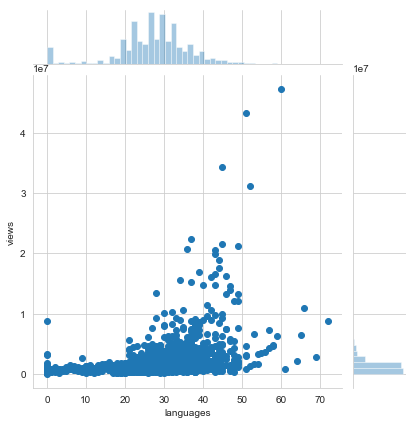

In [326]:
sns.jointplot(x='languages', y='views', data=ted)

- By looking at the chart, I can tell that there is some kind of correlation between languages and views; however not a strong relationship. Let me make sure by getting Pearson coefficient score. 

In [327]:
ted[['languages', 'views']].corr()

,languages,views
languages,1.000000,0.377623
views,0.377623,1.000000


- I was right, there is not a strong relationship; 0.38 suggest a medium correlation. 

### Step by step on how to take care of a list in a DataFrame column.

In [328]:
import ast
ted['tags'].head(5)

0    ['children', 'creativity', 'culture', 'dance',...
1    ['alternative energy', 'cars', 'climate change...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['Africa', 'Asia', 'Google', 'demo', 'economic...
Name: tags, dtype: object

In [329]:
#Get rid of string and makes it a list in correct format.
ted['tags'] = ted['tags'].apply(lambda x: ast.literal_eval(x))
ted['tags'].head(5)

0    [children, creativity, culture, dance, educati...
1    [alternative energy, cars, climate change, cul...
2    [computers, entertainment, interface design, m...
3    [MacArthur grant, activism, business, cities, ...
4    [Africa, Asia, Google, demo, economics, global...
Name: tags, dtype: object

In [330]:
ted.apply(lambda x: pd.Series(x['tags']),axis=1).head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,children,creativity,culture,dance,education,parenting,teaching,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,alternative energy,cars,climate change,culture,environment,global issues,science,sustainability,technology,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,computers,entertainment,interface design,media,music,performance,simplicity,software,technology,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MacArthur grant,activism,business,cities,environment,green,inequality,politics,pollution,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,Asia,Google,demo,economics,global development,global issues,health,math,statistics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
ted.apply(lambda x: pd.Series(x['tags']),axis=1).stack().head(15)

0  0              children
   1            creativity
   2               culture
   3                 dance
   4             education
   5             parenting
   6              teaching
1  0    alternative energy
   1                  cars
   2        climate change
   3               culture
   4           environment
   5         global issues
   6               science
   7        sustainability
dtype: object

In [332]:
ted.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True).head(15)

0              children
0            creativity
0               culture
0                 dance
0             education
0             parenting
0              teaching
1    alternative energy
1                  cars
1        climate change
1               culture
1           environment
1         global issues
1               science
1        sustainability
dtype: object

In [333]:
tagSeries = ted.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
tagSeries.name = 'tag'

In [334]:
#Join using index by default; Left join.
tedTags = ted.drop('tags', axis=1).join(tagSeries)
tedTags.head(10)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,languages,ratings,related_talks,url,views,dis_quo,months,week_day,film_year,tag
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Fri,2006,children
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Fri,2006,creativity
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Fri,2006,culture
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Fri,2006,dance
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Fri,2006,education
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Fri,2006,parenting
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Fri,2006,teaching
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,2006-02-24,06-26-06,...,43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,Feb,Fri,2006,alternative energy
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,2006-02-24,06-26-06,...,43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,Feb,Fri,2006,cars
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,2006-02-24,06-26-06,...,43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200

In [335]:
len(tedTags['tag'].unique())

416

- There are about 416 different categories to specify a TED Talk as.  

In [336]:
popTags = tedTags['tag'].value_counts().head(10)
popTags

technology       727
science          567
global issues    501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
Name: tag, dtype: int64

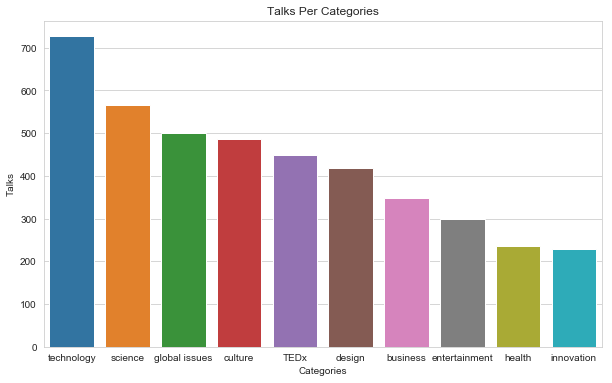

In [337]:
plt.figure(figsize=(10,6))
plt.title('Talks Per Categories')
plt.xlabel('Categories')
plt.ylabel('Talks')
sns.barplot(x=popTags.index, y=popTags.values)

### Connecting Transcripts datasets(Connecting two datasets)

In [338]:
trans = pd.read_csv('transcripts.csv')
trans.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [339]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 2 columns):
transcript    2467 non-null object
url           2467 non-null object
dtypes: object(2)
memory usage: 38.6+ KB


In [340]:
ted.head(1)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,months,week_day,film_year
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,"[children, creativity, culture, dance, educati...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Fri,2006


- Looks like both datasets have url in common, so joining using that column would be ideal. 

In [341]:
df = pd.merge(ted,trans,how='left',on='url')
df.head(2)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,languages,ratings,related_talks,url,views,dis_quo,months,week_day,film_year,transcript
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Fri,2006,Good morning. How are you?(Laughter)It's been ...
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,2006-02-24,06-26-06,...,43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,Feb,Fri,2006,"Thank you so much, Chris. And it's truly a gre..."


In [342]:
df.isnull().sum()

name                   0
title                  0
description            0
main_speaker           0
speaker_occupation     6
num_speaker            0
duration               0
event                  0
film_date              0
published_date         0
comments               0
tags                   0
languages              0
ratings                0
related_talks          0
url                    0
views                  0
dis_quo                0
months                 0
week_day               0
film_year              0
transcript            86
dtype: int64

- Fill null values for transcript with empty string.

In [343]:
df['transcript'] = df['transcript'].fillna('')

In [344]:
df['transcript'].isnull().sum()

0

- Getting work count for each Ted Talk in the dataset. 

In [345]:
df['word_count'] = df['transcript'].apply(lambda x: len(x.split()))
df['word_count'].describe()

count    2553.000000
mean     1971.550725
std      1009.494329
min         0.000000
25%      1235.000000
50%      1983.000000
75%      2681.000000
max      9044.000000
Name: word_count, dtype: float64

- Word counts per minute.

In [346]:
df['word_count_per_mins'] = df['word_count']/(df['duration']/60)
df['word_count_per_mins'].describe()

count    2553.000000
mean      142.147752
std        39.635348
min         0.000000
25%       131.069182
50%       149.018182
75%       164.984615
max       247.364865
Name: word_count_per_mins, dtype: float64

- Someone spoke 247 words per minutes, which is beyond impressive.

In [347]:
df[df['word_count_per_mins'] > 246]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,related_talks,url,views,dis_quo,months,week_day,film_year,transcript,word_count,word_count_per_mins
441,Mae Jemison: Teach arts and sciences together,Teach arts and sciences together,"Mae Jemison is an astronaut, a doctor, an art ...",Mae Jemison,"Astronaut, engineer, entrepreneur, physician a...",1,888,TED2002,2002-02-01,05-04-09,...,"[{'id': 66, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/mae_jemison_on_teach...,744257,0.000133,Feb,Fri,2002,What I want to do today is to spend some time ...,3661,247.364865


- Mae Jemison is the one to say 247 words per minute in the TED Talk called 'Teach arts and sciences together', which was given at TED2002 event. 

#### TED Ratings 

In [348]:
df['ratings'].head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [349]:
df['ratings'].iloc[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [350]:
#clean up json column
df['ratings'] = df['ratings'].apply(lambda x: ast.literal_eval(x))

In [388]:
df['ratings'][0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [392]:
#Get count for ratings. NOTE: ratings are not in same order.
df['funny'] = df['ratings'].apply(lambda x: [row['count'] for row in x if row['name'] == 'Funny'])
df['jaw_dropping'] = df['ratings'].apply(lambda x: [row['count'] for row in x if row['name'] == 'Jaw-dropping'])
df['beautiful'] = df['ratings'].apply(lambda x: [row['count'] for row in x if row['name'] == 'Beautiful'])
df['confusing'] = df['ratings'].apply(lambda x: [row['count'] for row in x if row['name'] == 'Confusing'])
df['inspiring'] = df['ratings'].apply(lambda x: [row['count'] for row in x if row['name'] == 'Inspiring'])
df['persuasive'] = df['ratings'].apply(lambda x: [row['count'] for row in x if row['name'] == 'Persuasive'])

In [394]:
df.head(2)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,film_year,transcript,word_count,word_count_per_mins,funny,jaw_dropping,beautiful,confusing,inspiring,persuasive
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,2006,Good morning. How are you?(Laughter)It's been ...,3066,158.041237,[19645],[4439],[4573],[242],[24924],[10704]
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,2006-02-24,06-26-06,...,2006,"Thank you so much, Chris. And it's truly a gre...",2089,128.290686,[544],[116],[58],[62],[413],[268]


In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553 entries, 0 to 2552
Data columns (total 30 columns):
name                   2553 non-null object
title                  2553 non-null object
description            2553 non-null object
main_speaker           2553 non-null object
speaker_occupation     2547 non-null object
num_speaker            2553 non-null int64
duration               2553 non-null int64
event                  2553 non-null object
film_date              2553 non-null datetime64[ns]
published_date         2553 non-null object
comments               2553 non-null int64
tags                   2553 non-null object
languages              2553 non-null int64
ratings                2553 non-null object
related_talks          2553 non-null object
url                    2553 non-null object
views                  2553 non-null int64
dis_quo                2553 non-null float64
months                 2553 non-null object
week_day               2553 non-null object
film_year

In [445]:
#Convert rating columns into int.
df['jaw_dropping'] = df['jaw_dropping'].astype('str').str.strip('[]').astype('int')
df['beautiful'] = df['beautiful'].astype('str').str.strip('[]').astype('int')
df['confusing'] = df['confusing'].astype('str').str.strip('[]').astype('int')
df['inspiring'] = df['inspiring'].astype('str').str.strip('[]').astype('int')
df['persuasive'] = df['persuasive'].astype('str').str.strip('[]').astype('int')

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553 entries, 0 to 2552
Data columns (total 30 columns):
name                   2553 non-null object
title                  2553 non-null object
description            2553 non-null object
main_speaker           2553 non-null object
speaker_occupation     2547 non-null object
num_speaker            2553 non-null int64
duration               2553 non-null int64
event                  2553 non-null object
film_date              2553 non-null datetime64[ns]
published_date         2553 non-null object
comments               2553 non-null int64
tags                   2553 non-null object
languages              2553 non-null int64
ratings                2553 non-null object
related_talks          2553 non-null object
url                    2553 non-null object
views                  2553 non-null int64
dis_quo                2553 non-null float64
months                 2553 non-null object
week_day               2553 non-null object
film_year

##### Most inspiring TED Talks show

In [451]:
df[['title', 'main_speaker', 'views', 'published_date', 'inspiring']].sort_values('inspiring', ascending=False).head()

,title,main_speaker,views,published_date,inspiring
0,Do schools kill creativity?,Ken Robinson,47227110,06-26-06,24924
677,How great leaders inspire action,Simon Sinek,34309432,05-04-10,21564
837,The power of vulnerability,Brené Brown,31168150,12-23-10,21444
1349,Your body language may shape who you are,Amy Cuddy,43155405,10-01-12,21210
1030,How to live before you die,Steve Jobs,8744428,10-05-11,17290


##### Most persuasive TED Talks show

In [452]:
df[['title', 'main_speaker', 'views', 'published_date', 'persuasive']].sort_values('persuasive', ascending=False).head()

,title,main_speaker,views,published_date,persuasive
0,Do schools kill creativity?,Ken Robinson,47227110,06-26-06,10704
677,How great leaders inspire action,Simon Sinek,34309432,05-04-10,8845
1349,Your body language may shape who you are,Amy Cuddy,43155405,10-01-12,6217
500,The puzzle of motivation,Dan Pink,18830983,08-23-09,4772
837,The power of vulnerability,Brené Brown,31168150,12-23-10,3510


##### Most funny TED Talks show

In [453]:
df[['title', 'main_speaker', 'views', 'published_date', 'funny']].sort_values('funny', ascending=False).head()

,title,main_speaker,views,published_date,funny
0,Do schools kill creativity?,Ken Robinson,47227110,06-26-06,19645
2117,This is what happens when you reply to spam email,James Veitch,20475972,01-08-16,7731
2164,Inside the mind of a master procrastinator,Tim Urban,14745406,03-15-16,7445
1129,The happy secret to better work,Shawn Achor,16209727,02-01-12,7315
675,"Lies, damned lies and statistics (about TEDTalks)",Sebastian Wernicke,2212944,04-30-10,5552


##### Most jaw_dropping TED Talks show

In [454]:
df[['title', 'main_speaker', 'views', 'published_date', 'jaw_dropping']].sort_values('jaw_dropping', ascending=False).head()

,title,main_speaker,views,published_date,jaw_dropping
108,How PhotoSynth can connect the world's images,Blaise Agüera y Arcas,4772595,05-26-07,14728
201,My stroke of insight,Jill Bolte Taylor,21190883,03-11-08,10464
553,The thrilling potential of SixthSense technology,Pranav Mistry,16097077,11-15-09,8416
176,Underwater astonishments,David Gallo,13926113,01-10-08,8328
168,"A performance of ""Mathemagic""",Arthur Benjamin,8360707,12-12-07,7196


##### Most beautiful TED Talks show

In [455]:
df[['title', 'main_speaker', 'views', 'published_date', 'beautiful']].sort_values('beautiful', ascending=False).head()

,title,main_speaker,views,published_date,beautiful
201,My stroke of insight,Jill Bolte Taylor,21190883,03-11-08,9437
837,The power of vulnerability,Brené Brown,31168150,12-23-10,7942
972,Building a park in the sky,Robert Hammond,704205,06-30-11,6685
246,The transformative power of classical music,Benjamin Zander,9315483,06-24-08,5967
530,The danger of a single story,Chimamanda Ngozi Adichie,13298341,10-06-09,5607


##### Most confusing TED Talks show

In [460]:
df[['title', 'main_speaker', 'views', 'published_date', 'confusing']].sort_values('confusing', ascending=False).head()

,title,main_speaker,views,published_date,confusing
494,I believe we evolved from aquatic apes,Elaine Morgan,1038576,07-30-09,531
311,An 8-dimensional model of the universe,Garrett Lisi,1491698,10-13-08,376
5,Why we do what we do,Tony Robbins,20685401,06-27-06,301
201,My stroke of insight,Jill Bolte Taylor,21190883,03-11-08,289
208,The call to learn,Clifford Stoll,2283491,03-25-08,278


In [462]:
df['related_talks'][0]

'[{\'id\': 865, \'hero\': \'https://pe.tedcdn.com/images/ted/172559_800x600.jpg\', \'speaker\': \'Ken Robinson\', \'title\': \'Bring on the learning revolution!\', \'duration\': 1008, \'slug\': \'sir_ken_robinson_bring_on_the_revolution\', \'viewed_count\': 7266103}, {\'id\': 1738, \'hero\': \'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg\', \'speaker\': \'Ken Robinson\', \'title\': "How to escape education\'s death valley", \'duration\': 1151, \'slug\': \'ken_robinson_how_to_escape_education_s_death_valley\', \'viewed_count\': 6657572}, {\'id\': 2276, \'hero\': \'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg\', \'speaker\': \'Linda Cliatt-Wayman\', \'title\': \'How to fix a broken school? Lead fearlessly, love hard\', \'duration\': 1027, \'slug\': \'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard\', \'viewed_count\': 1617101}, {\'id\': 892, \'hero\': \'https://pe.tedcdn.com/ima

In [465]:
df['related_talks'] = df['related_talks'].apply(lambda x: ast.literal_eval(x))
df['related_talks'][0]

[{'id': 865,
  'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg',
  'speaker': 'Ken Robinson',
  'title': 'Bring on the learning revolution!',
  'duration': 1008,
  'slug': 'sir_ken_robinson_bring_on_the_revolution',
  'viewed_count': 7266103},
 {'id': 1738,
  'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg',
  'speaker': 'Ken Robinson',
  'title': "How to escape education's death valley",
  'duration': 1151,
  'slug': 'ken_robinson_how_to_escape_education_s_death_valley',
  'viewed_count': 6657572},
 {'id': 2276,
  'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg',
  'speaker': 'Linda Cliatt-Wayman',
  'title': 'How to fix a broken school? Lead fearlessly, love hard',
  'duration': 1027,
  'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard',
  'viewed_count': 1617101},
 {'id': 892,
  'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb58

In [468]:
df['related_talks']

0       [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...
1       [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...
2       [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...
3       [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...
4       [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...
5       [{'id': 229, 'hero': 'https://pe.tedcdn.com/im...
6       [{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...
7       [{'id': 750, 'hero': 'https://pe.tedcdn.com/im...
8       [{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...
9       [{'id': 94, 'hero': 'https://pe.tedcdn.com/ima...
10      [{'id': 1749, 'hero': 'https://pe.tedcdn.com/i...
11      [{'id': 2228, 'hero': 'https://pe.tedcdn.com/i...
12      [{'id': 1153, 'hero': 'https://pe.tedcdn.com/i...
13      [{'id': 685, 'hero': 'https://pe.tedcdn.com/im...
14      [{'id': 2043, 'hero': 'https://pe.tedcdn.com/i...
15      [{'id': 2273, 'hero': 'https://pe.tedcdn.com/i...
16      [{'id': 2273, 'hero': 'https://pe.tedcdn.com/i...
17      [{'id'

In [474]:
s = df.apply(lambda x: pd.Series(x['related_talks']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'related'

In [478]:
related_df = df.drop('related_talks', axis=1).join(s)
related_df.head(2)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,transcript,word_count,word_count_per_mins,funny,jaw_dropping,beautiful,confusing,inspiring,persuasive,related
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,Good morning. How are you?(Laughter)It's been ...,3066,158.041237,19645,4439,4573,242,24924,10704,"{'id': 865, 'hero': 'https://pe.tedcdn.com/ima..."
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,06-26-06,...,Good morning. How are you?(Laughter)It's been ...,3066,158.041237,19645,4439,4573,242,24924,10704,"{'id': 1738, 'hero': 'https://pe.tedcdn.com/im..."


In [489]:
#related_df['related'][0].head(1)
related_df['related'] = related_df['related'].apply(lambda x: x['title'])

TypeError: string indices must be integers

In [492]:
related_df['related'].head(8)

0                    Bring on the learning revolution!
0               How to escape education's death valley
0    How to fix a broken school? Lead fearlessly, l...
0                    Education innovation in the slums
0                   A short intro to the Studio School
0    How America's public schools keep kids in poverty
1                   New thinking on the climate crisis
1                 The business logic of sustainability
Name: related, dtype: object

In [494]:
related_df[['name','title','main_speaker','related']].head(8)

,name,title,main_speaker,related
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,Bring on the learning revolution!
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,How to escape education's death valley
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,"How to fix a broken school? Lead fearlessly, l..."
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,Education innovation in the slums
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,A short intro to the Studio School
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,How America's public schools keep kids in poverty
1,Al Gore: Averting the climate crisis,Averting the climate crisis,Al Gore,New thinking on the climate crisis
1,Al Gore: Averting the climate crisis,Averting the climate crisis,Al Gore,The business logic of sustainability
